<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Límite, continuidad y derivadas</h1>

<h4 align="center">Funciones de una variable</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en conceptos 
matemáticos para resolver ecuaciones de una variable y derivadas.</div>

## Cálculo


El Cálculo es una de las áreas aplicadas del Análisis Real y Complejo, cuyo objetivo es entender las propiedades de objetos que toman valores en estos conjuntos, como las sucesiones y funciones.

En modelamiento numérico, se puede utilizar la teoría de Cálculo de forma retroactiva con los métodos de visualización, ya que, por un lado, el hecho de conocer el comportamiento de un modelo debe verse ratificado por estimaciones numéricas y gráficos mientras que, por otro lado, un buen uso de herramientas gráficas podría permitir aproximarnos a características del modelo que no conocemos <i>a priori</i>.

Para comenzar, introducimos el concepto de **límite** para luego definir **continuidad** de una función. Finalmente, construimos la noción de **derivada numérica**, y vemos qué ventajas y limitaciones presenta.

## 3. Derivada

### 3.1 Motivación

<p><img alt="DataOwl" width=320 src="https://upload.wikimedia.org/wikipedia/commons/1/18/Derivative.svg", align="center", hspace=0, vspace=5></p>

Recordemos que una recta se determina de forma única conociendo dos puntos $(x_1,y_1)$, $(x_2,y_2)$ que pertenecen a ella. La ecuación de la recta está dada por

$$y-y_k\ =\ m(x-x_k),\quad k=1\ \textrm{o}\ 2,\qquad m\ =\ \frac{y_2-y_1}{x_2-x_1}$$

En el esquema anterior, podemos calcular la pendiente de la recta que corta a una función $f$ en dos puntos, simplemente por la fórmula

$$m\ =\ \frac{f(x+h)-f(x)}{(x+h)-h}\ =\ \frac{f(x+h)-f(x)}{h}$$

Si el paso $h$ tiende a $0$, esquemáticamente la recta pasa de ser secante en dos puntos distintos, a ser tangente en un solo punto, como en el siguiente gráfico:

<p><img alt="DataOwl" width=300 src="https://upload.wikimedia.org/wikipedia/commons/1/13/Dydx.jpg", align="center", hspace=0, vspace=5></p>

Por lo tanto, si esta recta tangente es posible definirla, su pendiente estará dada por

$$m\ =\ \displaystyle\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\ =\ f´(x)\ =\ \frac{df}{dx}(x)$$

Conocer esta cantidad puede ser muy útil, ya que permite saber si la función crece o decrece en un punto $x$. Así, se puede construir métodos de optimización basados en el cálculo de una derivada, entre otros que serán vistos próximamente.

En computación científica, suele denotarse $\Delta x=h$, ya que esta cantidad describe un paso pequeño desde un valor $x$ fijo. Mientras más pequeño sea, más preciso debería ser el resultado. Sin embargo, existen varias formas de calcular una derivada, y también existen casos en que no es posible obtener una derivada de forma consistente. El objetivo es ver algunos de estos métodos y algunas de estas excepciones.

### 3.2 Derivadas numéricas

Siguiendo la motivación anterior, una forma de aproximar la derivada es definir un paso $\Delta x$ y moverse "hacia la derecha" con respecto a $x$. Esto define la derivada *forward*, y está dada por la fórmula

$$f_{\textrm{for}}'(x_i)\ =\ \frac{f(x_i+\Delta x)-f(x_i)}{\Delta x}$$

donde $x_i$ es el i-ésimo elemento del arreglo $\vec{x}$. De forma muy similar, se puede calcular la diferencia si se avanza hacia la derecha desde una posición anterior a $x_i$, lo cual se conoce como derivada *backward*, dada por la fórmula

$$f_{\textrm{back}}'(x_i)\ =\ \frac{f(x_i)-f(x_i-\Delta x)}{\Delta x}$$

Ambas pretenden aproximar el valor real de una derivada y se espera que, mientras más pequeño sea el valor de $\Delta x$, más preciso sea el resulado. Compararemos ambos métodos al aplicarlo en una función cuya derivada conocemos de antemano.

In [1]:
# Importando las librerías
%matplotlib notebook
# import experimento4 as ex # Opcional, en caso de que definan una función derivada o utilicen la que yo definí
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.linspace(- 2 * np.pi, 2 * np.pi, 10000)
dx = 0.001
f = np.sin(x)
fforward = []
fbackward = []

for i in x:
    der1 = (np.sin(i + dx) - np.sin(i)) / dx
    fforward.append(der1)
    
    der2 = (np.sin(i) - np.sin(i - dx)) / dx
    fbackward.append(der2)



<IPython.core.display.Javascript object>


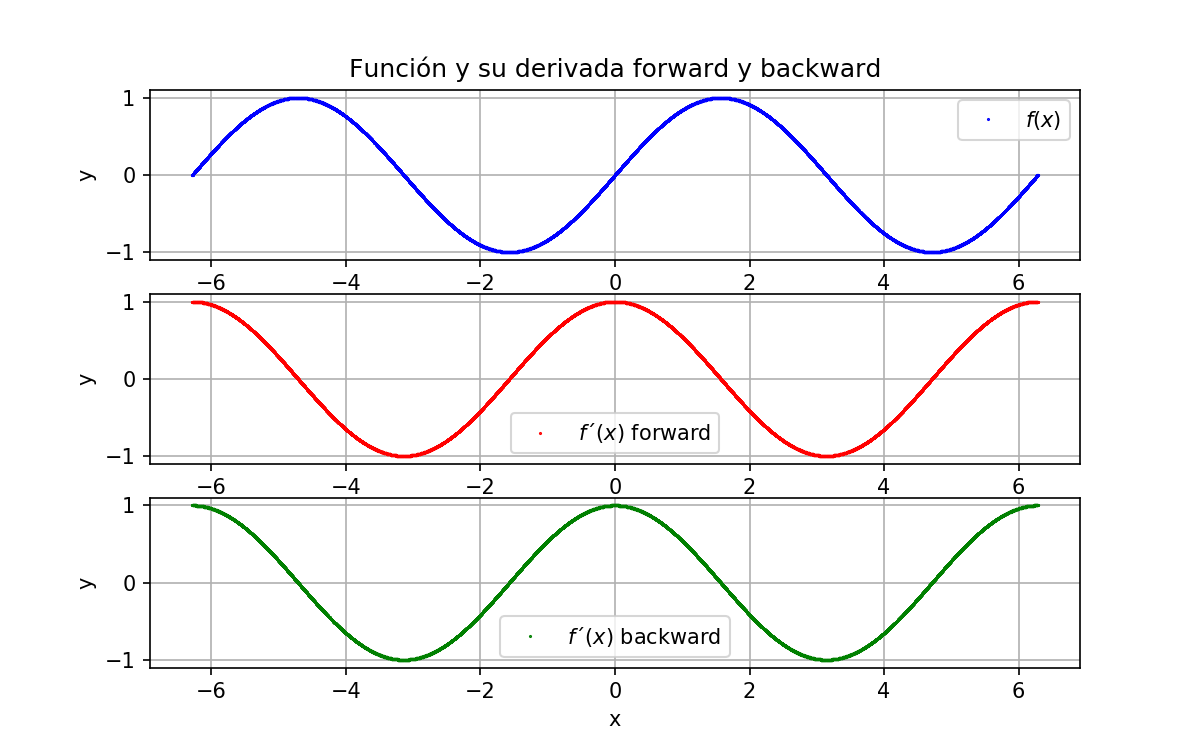

In [3]:
fig1, ax1 = plt.subplots(3, 1, figsize=(8, 5))

# Notar que el atributo label soporta notación de LaTeX (para ver fórmulas más bonitas)
# Averiguar qué hace cada instrucción escrita (set_title, set_xticks, etc.)

# Gráfico de arriba
ax1[0].plot(x, f, linestyle='', marker='.', color='blue', label='$f(x)$', markersize=1)
ax1[0].set_title('Función y su derivada forward y backward')
ax1[0].set_ylabel('y')
ax1[0].legend()
ax1[0].grid()

# Gráfico del medio
ax1[1].plot(x, fforward, linestyle='', marker='.', color='red', label='$f´(x)$ forward', markersize=1)
ax1[1].set_ylabel('y')
ax1[1].legend()
ax1[1].grid()

# Gráfico de abajo
ax1[2].plot(x, fforward, linestyle='', marker='.', color='green', label='$f´(x)$ backward', markersize=1)
ax1[2].set_xlabel('x')
ax1[2].set_ylabel('y')
ax1[2].legend()
ax1[2].grid()

plt.show()

In [4]:
f2 = np.cos(x) # Ésta es la derivada del seno. Pueden probar con otra función cuya derivada conozcan de antemano


<IPython.core.display.Javascript object>


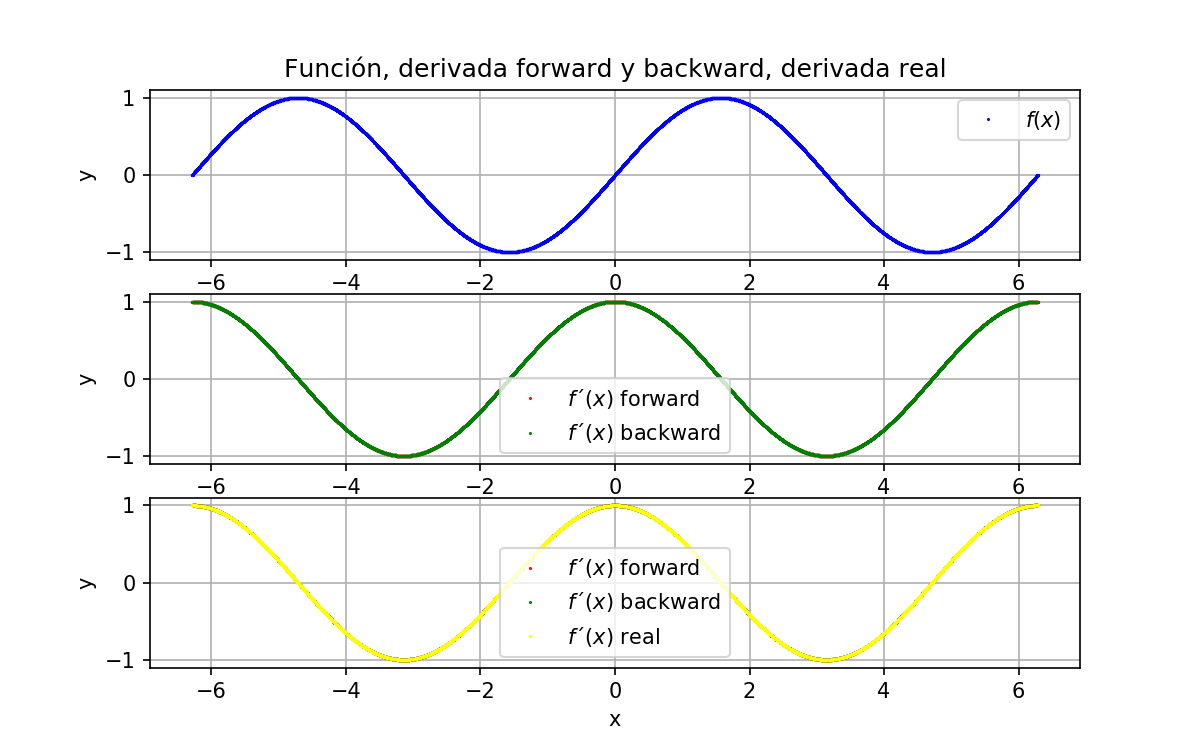

In [5]:
fig2, ax2 = plt.subplots(3, 1, figsize=(8, 5))

# Notar que el atributo label soporta notación de LaTeX (para ver fórmulas más bonitas)
# Averiguar qué hace cada instrucción escrita (set_title, set_xticks, etc.)

# Gráfico de arriba
ax2[0].plot(x, f, linestyle='', marker='.', color='blue', label='$f(x)$', markersize=1)
ax2[0].set_title('Función, derivada forward y backward, derivada real')
ax2[0].set_ylabel('y')
ax2[0].legend()
ax2[0].grid()

# Gráfico del medio
ax2[1].plot(x, fforward, linestyle='', marker='.', color='red', label='$f´(x)$ forward', markersize=1)
ax2[1].plot(x, fbackward, linestyle='', marker='.', color='green', label='$f´(x)$ backward', markersize=1)
ax2[1].set_ylabel('y')
ax2[1].legend()
ax2[1].grid()

# Gráfico de abajo
ax2[2].plot(x, fforward, linestyle='', marker='.', color='red', label='$f´(x)$ forward', markersize=1)
ax2[2].plot(x, fbackward, linestyle='', marker='.', color='green', label='$f´(x)$ backward', markersize=1)
ax2[2].plot(x, f2, linestyle='', marker='.', color='yellow', label='$f´(x)$ real', markersize=1)
ax2[2].set_xlabel('x')
ax2[2].set_ylabel('y')
ax2[2].legend()
ax2[2].grid()

plt.show()

Como vemos en los gráficos anteriores, es indistinguible un resultado de otro. Esto se debe, más que nada, a que el paso elegido es suficientemente bueno para lograr esto. Si probásemos con $\Delta x=0.1$, por ejemplo, tendríamos diferencias notables. También influye la cantidad de puntos en el arreglo $\vec{x}$. Queda propuesto probar con distintos tamaños de arreglos y con distintos valores para $\Delta x$.

Considerando ambas fórmulas anteriores, se puede construir un tercer método de derivación, conocido como *derivada central*. Nace de asumir que $f'(x_i)=f_{\textrm{back}}'(x_i)=f_{\textrm{for}}'(x_i)$ y calcular la suma entre ambos métodos, lo que da lugar a

$$f_{\textrm{cent}}'\ =\ \frac{f(x_i+\Delta x)-f(x_i-\Delta x)}{2\Delta x}$$

lo cual es posible si se considera que $\Delta x$ tiene siempre el mismo valor (para un caso más general, puede revisar el módulo ***experimento4.py***). Este método resulta dar valores aún más precisos. Sin embargo, veremos que los tres tienen limitaciones en su aplicación.

In [6]:
dx = 0.001
fcentral = []

for i in x:
    der3 = (np.sin(i + dx) - np.sin(i - dx)) / (2 * dx)
    fcentral.append(der3)

<IPython.core.display.Javascript object>


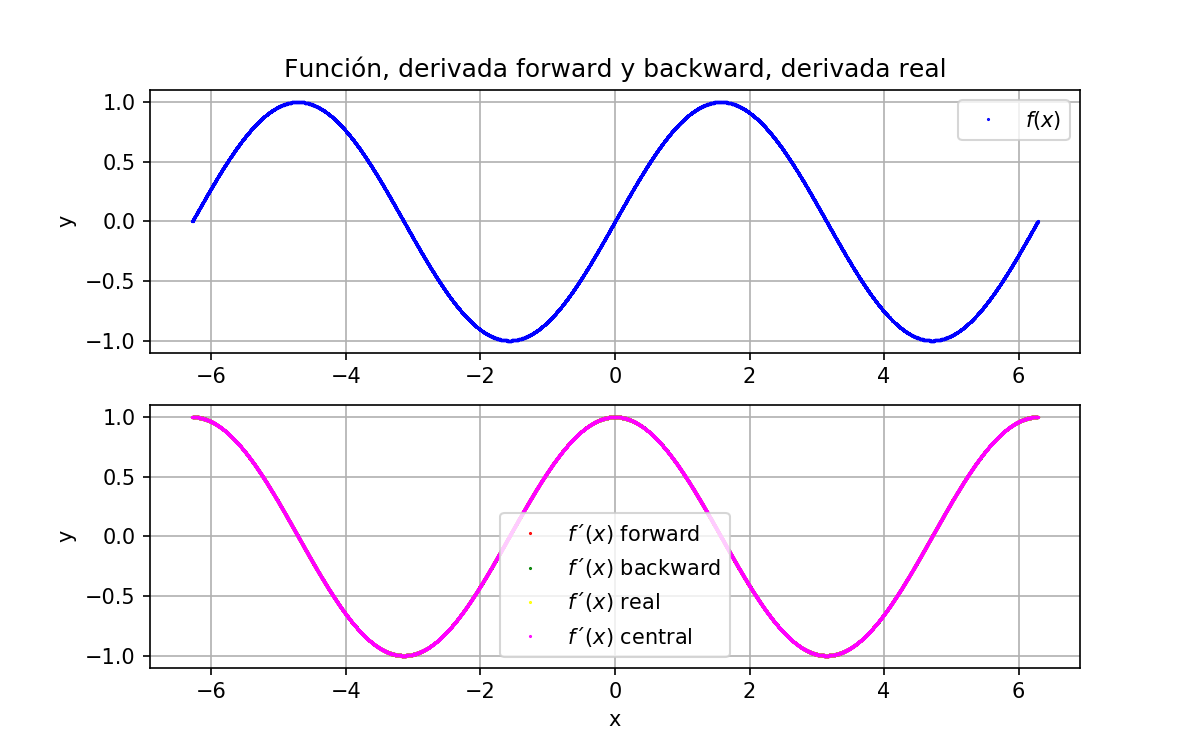

In [7]:
fig3, ax3 = plt.subplots(2, 1, figsize=(8, 5))

# Notar que el atributo label soporta notación de LaTeX (para ver fórmulas más bonitas)
# Averiguar qué hace cada instrucción escrita (set_title, set_xticks, etc.)

# Gráfico de arriba
ax3[0].plot(x, f, linestyle='', marker='.', color='blue', label='$f(x)$', markersize=1)
ax3[0].set_title('Función, derivada forward y backward, derivada real')
ax3[0].set_ylabel('y')
ax3[0].legend()
ax3[0].grid()

# Gráfico del medio
ax3[1].plot(x, fforward, linestyle='', marker='.', color='red', label='$f´(x)$ forward', markersize=1)
ax3[1].plot(x, fbackward, linestyle='', marker='.', color='green', label='$f´(x)$ backward', markersize=1)
ax3[1].plot(x, f2, linestyle='', marker='.', color='yellow', label='$f´(x)$ real', markersize=1)
ax3[1].plot(x, fcentral, linestyle='', marker='.', color='magenta', label='$f´(x)$ central', markersize=1)
ax3[1].set_ylabel('y')
ax3[1].set_xlabel('x')
ax3[1].legend()
ax3[1].grid()

plt.show()

### 3.3 Limitaciones

Desde el punto de vista topológico, si una función $f$ está definida en un intervalo $[a,b]$, no es posible calcular su derivada en los puntos $x=a$ y $x=b$, ya que en esos puntos no hay una recta tangente única; son, de hecho, infinitas. Además, no tiene sentido definir una derivada para $x<a$ o $x>b$, pues la función no toma valores ahí. Así, cuando se llega al extremo izquierdo de un intervalo (cerca de $x=a$), la única forma de calcular una derivada de forma consistente es usar la derivada forward, mientras que cuando se llega al extremo derecho (cerca de $x=b$), se debe usar la derivada backward. Para cualquier otro valor, se puede utilizar la derivada central.

En general, se puede utilizar un arreglo $\vec{x}$ que recorra el intervalo $[a,b]$ de forma equiespaciada (lo que se logra con la función ***linspace***). A partir de este arreglo, una forma de obtener un valor $\Delta x$ que sirva para calcular lo anterior es simplemente tomar $\Delta x=x_2-x_1$, o lo que en notación Python sería
```Python
x = np.linspace(a, b, N) # a y b los extremos del intervalo, N el número de puntos que desean en su arreglo
dx = x[1] - x[0]
```
Matemáticamente, esto dará $\Delta x\ =\ \frac{b-a}{N}$, por lo que, mientras más puntos se tenga en el arreglo, menor será el valor del paso, por lo que mejor será la aproximación. Hecho esto, y considerando lo antes dicho, se puede calcular la derivada de una función $f(x)$ en todo el intervalo sin el problema de salir del intervalo permitido.

In [8]:
# Aplicación de lo anterior para el cálculo de la derivada de una función

x = np.linspace(- 2 * np.pi, 2 * np.pi, 10000)
y = np.sin(x)

dx = x[1] - x[0]
N = len(x)

deriv = []

for i, Y in enumerate(y): # Averiguar qué hace enumerate!
    if i == 0:          # Extremo izquierdo: usamos derivada forward
        der1 = (y[1] - y[0]) / dx
        deriv.append(der1)
        
    elif i == N - 1:    # Extremo derecho: usamos derivada backward (recordar que índice de x e y llega hasta N-1)
        der1 = (y[N - 1] - y[N - 2]) / dx
        deriv.append(der1)
            
    else:               # Extremo izquierdo: usamos derivada forward
        der1 = (y[i + 1] - y[i - 1]) / (2 * dx)
        deriv.append(der1)

<IPython.core.display.Javascript object>


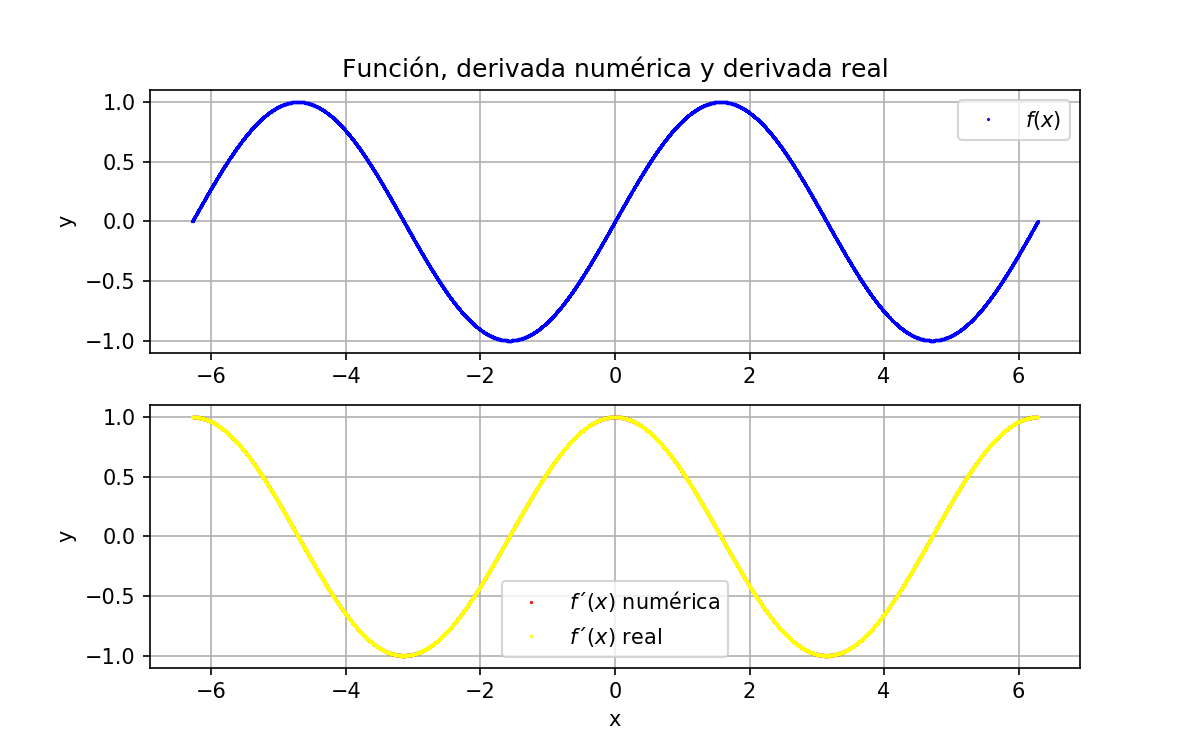

In [9]:
fig4, ax4 = plt.subplots(2, 1, figsize=(8, 5))

# Notar que el atributo label soporta notación de LaTeX (para ver fórmulas más bonitas)
# Averiguar qué hace cada instrucción escrita (set_title, set_xticks, etc.)

# Gráfico de arriba
ax4[0].plot(x, y, linestyle='', marker='.', color='blue', label='$f(x)$', markersize=1)
ax4[0].set_title('Función, derivada numérica y derivada real')
ax4[0].set_ylabel('y')
ax4[0].legend()
ax4[0].grid()

# Gráfico del medio
ax4[1].plot(x, deriv, linestyle='', marker='.', color='red', label='$f´(x)$ numérica', markersize=1)
ax4[1].plot(x, f2, linestyle='', marker='.', color='yellow', label='$f´(x)$ real', markersize=1)
ax4[1].set_ylabel('y')
ax4[1].set_xlabel('x')
ax4[1].legend()
ax4[1].grid()

plt.show()

## Ejercicios

**1.-** Utilizar el Notebook para calcular, si es posible, la derivada de las siguientes funciones (cuando haya un punto conflictivo, recuerde analizar la convergencia de la función resultante y considere la necesidad de definir una excepción). Puede calcular la derivada de la función que desee, además de estas:

  <ol style="list-style-type:lower-alpha">
  <li>$\qquad f(x) = x^p,\quad p\in\mathbb{R}$. Pruebe con distintos valores de $p$ (distinga entre $p\ge0$ y $p<0$ $$\\$$</li>
    
  <li>$\qquad g(x) = |x|$ $$\\$$</li>
    
  <li>$\qquad h(x) = e^{-x^2}$ $$\\$$</li>

  <li>$\qquad k(x) = \arctan(x)$ $$\\$$</li>
    
  <li>$\qquad \ell(x) = \frac{x}{\sqrt{x^2+1}}$ $$\\$$</li>
    
  <li>$\qquad m(x) = \frac{\sin(x)}{x},\quad x\neq0$</li>
 </ol> 

 **2.-** Encuentre una forma de resolver la ecuación $f'(x)=0$. Puede basarse en ejercicios anteriores para ello. Teniendo en cuenta la motivación geométrica de la derivada, ¿qué significa que $f'(x)=0$ en un punto $x$ dado?